### **Importing Necessory Libraries**

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

### **Loading Tha Data**

In [83]:
data = fetch_california_housing()

In [84]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

In [85]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### **Univeriate nalysis**

<Figure size 1000x800 with 0 Axes>

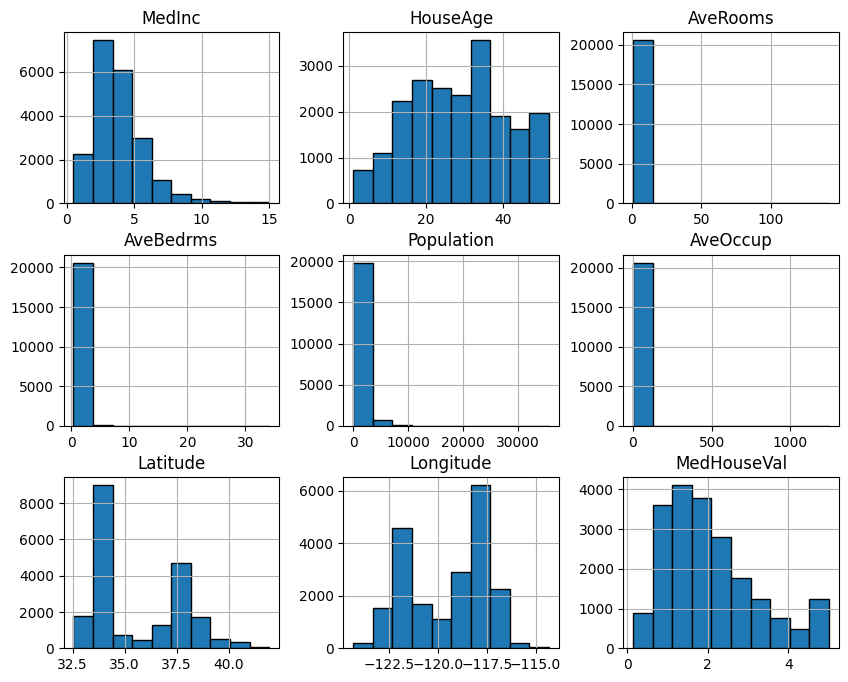

In [86]:
plt.figure(figsize=(10,8))
df.hist(figsize=(10,8), bins= 10, edgecolor='k')
plt.show()

### **RelationShip Model**

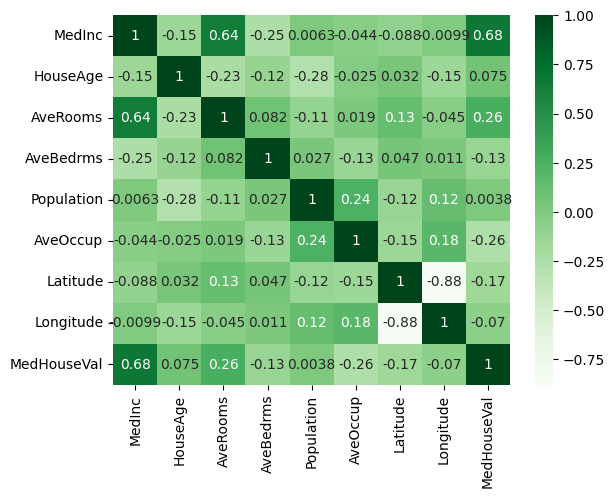

In [87]:
corr = df.corr(method='spearman')

sns.heatmap(corr, annot=True, cmap='Greens')
plt.show()

In [88]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

### **Model Building**

In [89]:
x  = df[['MedInc', 'HouseAge', 'AveRooms','AveOccup']]
y = df['MedHouseVal']

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### **Standerddizing The Observe Data**

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

#### **Applying Polynomial Degree**

In [92]:
poly = PolynomialFeatures(degree=3, include_bias=True)

x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.fit_transform(x_test_scaled)

#### **Initializing the Linear model**

In [93]:
model = LinearRegression()
model.fit(x_train_poly, y_train)

LinearRegression()

#### **Predicting the model**

In [94]:
y_pred =  model.predict(x_test_poly)
y_pred

array([0.45125437, 1.67585141, 4.60668127, ..., 5.03908943, 1.99013961,
       0.66709394])

#### **Evaluating the model**

In [95]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print(r2)

1742.8742988152558
-1329.023166626117


### **Appling Hyperparameter to the Model (Regulraization)**

In [96]:
from sklearn.linear_model import Lasso, Ridge

#### **Lasso**

In [97]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train_scaled, y_train)

Lasso(alpha=0.1)

In [98]:
y_pred_lasso = lasso.predict(x_test_scaled)

In [99]:
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso) *100

print(lasso_mse)
print(lasso_r2)

0.6806088214419466
48.061343233804784


- r² > 0.80 or 80 = model excellent
- r² ~ 0.60 good/acceptable
- r² < 0.40 or 40 poor

#### **Ridge**

In [100]:
ridge = Ridge(alpha=1)
ridge.fit(x_train_scaled, y_train)

Ridge(alpha=1)

In [101]:
y_pred_ridge = ridge.predict(x_test_scaled)

In [102]:
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge) *100

print(ridge_mse)
print(ridge_r2)

0.6517888056553239
50.26065781918796


### **Storing The Model into Pickle file**

In [103]:
import joblib

In [104]:
joblib.dump(ridge, 'linear_model.pkl')

['linear_model.pkl']

#### **Pridiction using Pickle File Model**

In [105]:
load_model = joblib.load('linear_model.pkl')
y_pred = load_model.predict(x_test)
y_pred

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


array([ 8.35324923, 10.13943846, 15.76568803, ..., 14.60192465,
       11.62015549,  8.25693811])

In [106]:
x_train.head()

,MedInc,HouseAge,AveRooms,AveOccup
14196,3.2596,33.0,5.017657,3.691814
8267,3.8125,49.0,4.473545,1.738095
17445,4.1563,4.0,5.645833,2.723214
14265,1.9425,36.0,4.002817,3.994366
2271,3.5542,43.0,6.268421,2.300000


In [107]:
new_data = [[5, 50, 4, 2]]
prediction = load_model.predict(new_data)
print(prediction)

[16.59662879]
